In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the dataset
df = pd.read_csv('titanic_train.csv')

In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

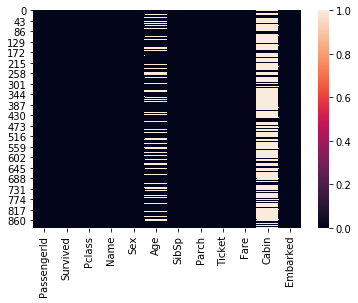

In [7]:
sns.heatmap(df.isnull())

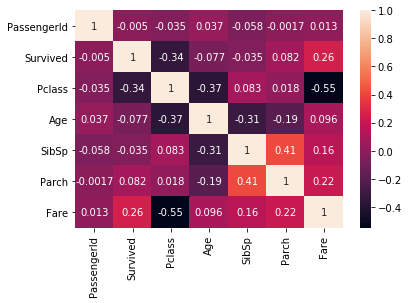

In [9]:
sns.heatmap(df.corr(),annot=True)

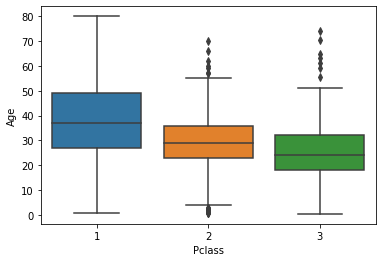

In [12]:
sns.boxplot(x='Pclass',y='Age',data=df)

In [15]:
df.drop(['PassengerId','SibSp','Fare','Cabin'],axis=1,inplace=True)

In [17]:
df.drop(['Name'],axis=1,inplace=True)

In [19]:
df.drop(['Ticket'],axis=1,inplace=True)

In [20]:
df

,Survived,Pclass,Sex,Age,Parch,Embarked
0,0,3,male,22.0,0,S
1,1,1,female,38.0,0,C
2,1,3,female,26.0,0,S
3,1,1,female,35.0,0,S
4,0,3,male,35.0,0,S
...,...,...,...,...,...,...
886,0,2,male,27.0,0,S
887,1,1,female,19.0,0,S
888,0,3,female,NaN,2,S
889,1,1,male,26.0,0,C


## Explore the data(EDA)

In [25]:
d1 = df['Survived'].value_counts()

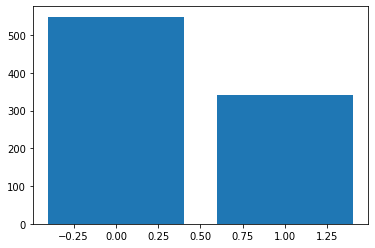

In [27]:
plt.bar(d1.index,d1.values)
plt.show()

In [36]:
(d1.values[0]/(d1.values[0]+d1.values[1]))*100
#we got to know around 61 percent of the data is not survived
#if you decide to split your data into 70:30 ratio
#but is there any chance that in 70% of training data you will have 61% of data not surived and 9 % of the data for survived

61.61616161616161

In [40]:
p1 = df['Pclass'].value_counts()

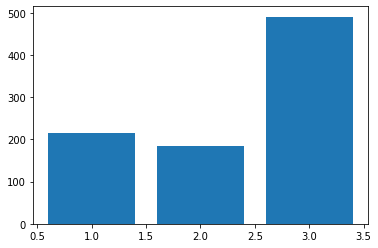

In [41]:
plt.bar(p1.index,p1.values)
plt.show()

In [44]:
s1 = df['Sex'].value_counts()

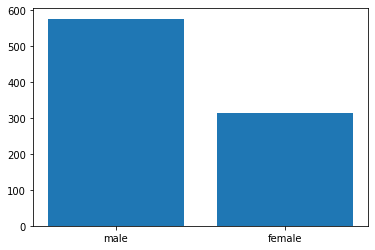

In [45]:
plt.bar(s1.index,s1.values)
plt.show()

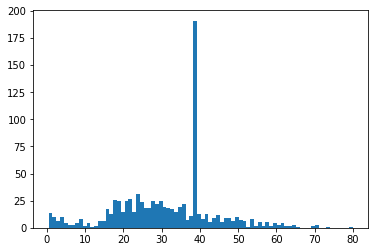

In [123]:
plt.hist(df['Age'],bins=80)
plt.show()

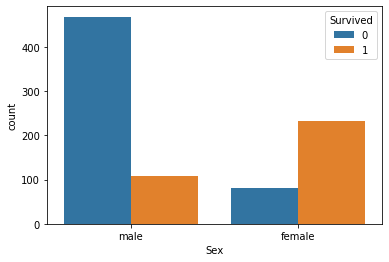

In [127]:
sns.countplot(df['Sex'],hue=df['Survived'])

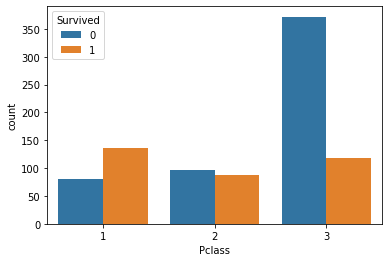

In [130]:
sns.countplot(df['Pclass'],hue=df['Survived'])

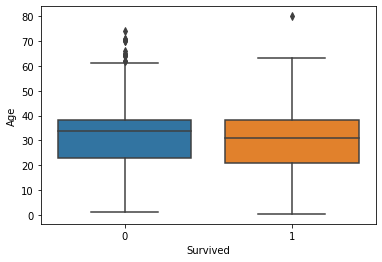

In [133]:
sns.boxplot(x='Survived',y='Age',data=df)

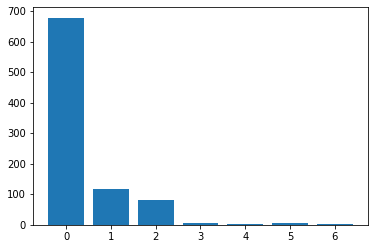

In [137]:
plt.bar(df['Parch'].value_counts().index,df['Parch'].value_counts().values)
plt.show()

In [140]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [52]:
#q1, a2,q3, iqr = q3-q1, value<q1-1.5*IQR or value>q3+1.5*IOR

In [56]:
#we already know that there are missing values in the age column

In [76]:
df['Age'].skew()
#+ver skew mean data is right skewed , then we consider median 

0.38910778230082704

In [77]:
df['Age'].median()

28.0

In [81]:
data_f = df.groupby('Pclass')['Age'].mean()

In [95]:
data_f

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [101]:
df['Age'].isnull().sum()

177

In [112]:
data_f.values[0]

38.233440860215055

In [120]:
df.loc[df['Pclass']==1,'Age']=df.loc[df['Pclass']==1,'Age'].fillna(data_f.values[0])
df.loc[df['Pclass']==2,'Age']=df.loc[df['Pclass']==2,'Age'].fillna(data_f.values[1])
df.loc[df['Pclass']==3,'Age']=df.loc[df['Pclass']==3,'Age'].fillna(data_f.values[2])

In [121]:
df['Age'].isnull().sum()

0

In [122]:
#categorical encoding
df

,Survived,Pclass,Sex,Age,Parch,Embarked
0,0,3,male,22.000000,0,S
1,1,1,female,38.000000,0,C
2,1,3,female,26.000000,0,S
3,1,1,female,35.000000,0,S
4,0,3,male,35.000000,0,S
...,...,...,...,...,...,...
886,0,2,male,27.000000,0,S
887,1,1,female,19.000000,0,S
888,0,3,female,38.233441,2,S
889,1,1,male,26.000000,0,C


In [146]:
#categorical encoding
final_data = pd.get_dummies(df,drop_first=True)

In [148]:
#dependent data and independent data
Y = final_data.iloc[:,0].values
X= final_data.iloc[:,1:].values

In [152]:
#standard scaler
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X_new= st.fit_transform(X)

In [214]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_new,Y,test_size=0.3)

In [215]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [216]:
y_pred = lr.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0], dtype=int64)

In [206]:
#confusion matrix and classification
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,y_pred)

array([[154,  18],
       [ 24,  72]], dtype=int64)

In [217]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       155
           1       0.79      0.70      0.74       113

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.79       268
weighted avg       0.79      0.79      0.79       268



In [222]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr,X_train,Y_train,cv=10).mean()

0.8041218637992831

In [223]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr,X_test,Y_test,cv=10).mean()

0.7837606837606838

In [ ]:
#data processing on testing data

In [157]:
df2 = pd.read_csv('titanic_test.csv')

In [160]:
df2.drop(['PassengerId','Name','SibSp','Ticket','Fare','Cabin'],inplace=True,axis=1)

In [168]:
age_d = df2.groupby('Pclass')['Age'].mean()
age_d

Pclass
1    40.918367
2    28.777500
3    24.027945
Name: Age, dtype: float64

In [170]:
df2.loc[df2['Pclass']==1,'Age'] = df2.loc[df2['Pclass']==1,'Age'].fillna(age_d.values[0])
df2.loc[df2['Pclass']==2,'Age'] = df2.loc[df2['Pclass']==2,'Age'].fillna(age_d.values[1])
df2.loc[df2['Pclass']==3,'Age'] = df2.loc[df2['Pclass']==3,'Age'].fillna(age_d.values[2])

In [173]:
df2_new= pd.get_dummies(df2,drop_first=True)

In [175]:
df2_final= st.fit_transform(df2_new)

In [176]:
df2_final

array([[ 0.87348191,  0.39320118, -0.4002477 ,  0.75592895,  2.84375747,
        -1.35067551],
       [ 0.87348191,  1.35849848, -0.4002477 , -1.32287566, -0.35164743,
         0.74037028],
       [-0.31581919,  2.51685524, -0.4002477 ,  0.75592895,  2.84375747,
        -1.35067551],
       ...,
       [ 0.87348191,  0.70209632, -0.4002477 ,  0.75592895, -0.35164743,
         0.74037028],
       [ 0.87348191, -0.41549052, -0.4002477 ,  0.75592895, -0.35164743,
         0.74037028],
       [ 0.87348191, -0.41549052,  0.61989583,  0.75592895, -0.35164743,
        -1.35067551]])

In [178]:
prediction = lr.predict(df2_final)

In [196]:
data = pd.DataFrame(prediction,columns=['result'])
data.to_csv('output.csv',index=False)

0      0
1      0
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Length: 418, dtype: int64